In [4]:
import psycopg2
import render_password as rpw

#-----------寫入try, except，並利用psycopg2.Error傳出錯誤訊息-----------------
try:
    conn = psycopg2.connect(database=rpw.DATABASE, 
                            user=rpw.USER, 
                            password=rpw.PASSWORD, 
                            host=rpw.HOST, 
                            port="5432") #port是defult，固定填5432
except psycopg2.Error as e:
    print(e)

else:
    print(conn) #出現<connection object at 0x0000020C374A2AC0... --> 代表連線成功
    #conn.close() #連線後的conn一定要關閉

#寫入youbike1320筆資料
import csv

csv_file = 'youbike.csv'
cur = conn.cursor()

with open(csv_file, 'r', newline='',encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
            sql = '''INSERT INTO 台北市youbike (站點名稱, 更新時間, 行政區, 地址, 總車輛數, 可借, 可還)
                VALUES (%s, %s, %s, %s, %s, %s, %s)'''
            cur.execute(sql, row)
conn.commit()
cur.close()
print('資料匯入成功')

<connection object at 0x00000143E370F780; dsn: 'user=rachelyah password=xxx dbname=maindb_eef7 host=dpg-cl5g50c72pts73elkvqg-a.singapore-postgres.render.com port=5432', closed: 0>
資料匯入成功


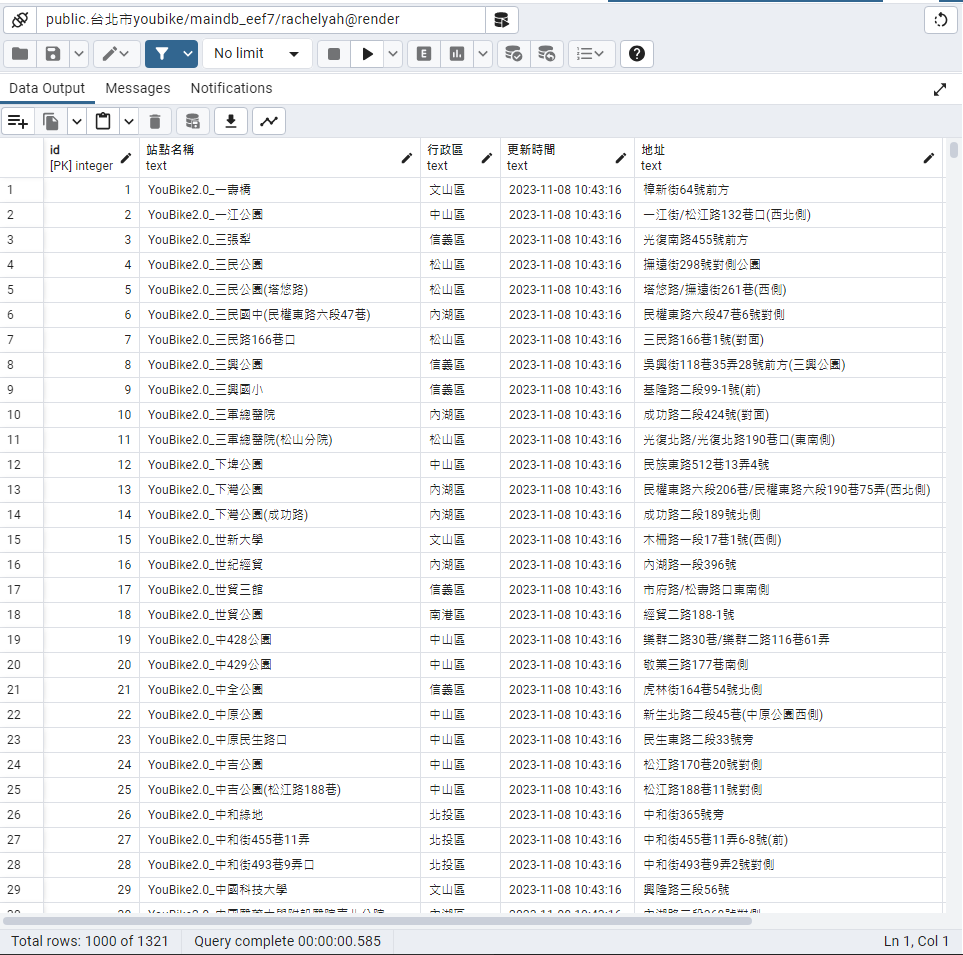